## Flower blue or Red - prediction 

In [6]:
import numpy


In [7]:
def nn(m1,m2,w1,w2,b):
    z=m1*w1+m2*w2+b
    return sigmoid(z)
def sigmoid(x):
    return 1/(1+numpy.exp(-x))
    

In [8]:
w1=numpy.random.randn()
w2=numpy.random.randn()
b=numpy.random.randn()




In [9]:
w1

0.4665212330995581

In [10]:
w2

-0.5389367520857405

In [11]:
b

0.9741294090541953

In [12]:
def cost(b):
    return (b-4)**2

In [13]:
cost(4)

0

In [14]:
def num_slope(b):
    h = 0.0001
    return (cost(b+h)-cost(b))/h


In [15]:
num_slope(3)

-1.9999000000037181

In [16]:
def slope(b):
    return 2*(b-4)


In [17]:
slope(3)

-2

In [18]:
slope(5)

2

In [19]:
b=6
for i in range(100):
    
    b = b-.1*slope(b)
    print(b)


5.6
5.279999999999999
5.023999999999999
4.8191999999999995
4.65536
4.524288
4.4194304
4.33554432
4.268435456000001
4.2147483648
4.17179869184
4.137438953472
4.1099511627776
4.08796093022208
4.070368744177664
4.056294995342131
4.045035996273705
4.036028797018964
4.028823037615171
4.023058430092137
4.018446744073709
4.014757395258967
4.011805916207174
4.009444732965739
4.007555786372591
4.0060446290980725
4.004835703278458
4.003868562622766
4.003094850098213
4.0024758800785705
4.0019807040628566
4.001584563250285
4.001267650600228
4.001014120480183
4.000811296384146
4.000649037107317
4.000519229685854
4.000415383748683
4.0003323069989465
4.0002658455991575
4.000212676479326
4.000170141183461
4.000136112946769
4.000108890357415
4.000087112285932
4.000069689828746
4.0000557518629964
4.000044601490397
4.000035681192317
4.000028544953854
4.000022835963083
4.000018268770466
4.000014615016373
4.000011692013098
4.000009353610478
4.000007482888383
4.000005986310706
4.000004789048565
4.0000038312

In [20]:
for i in range(3):
    print(i)

0
1
2


## Mystery Flower

In [21]:
%matplotlib inline

In [22]:
from matplotlib import pyplot as plt
import numpy as np

In [47]:
# Each point is length,width,type(0,1)

data = [[3,1.5,1],
       [2,1,0],
       [4,1.5,1],
       [3,1,0],
       [3.5,.5,1],
       [2,.5,0],
       [5.5,1,1],
       [1,1,0]]
mystery_flower = [4.5,1]

In [48]:
data[0]

[3, 1.5, 1]

In [49]:
# Network

#     0  flower type
#   /  \   w1,w2,b
#  0    0 length,width

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [50]:
np.random.randn()

-1.683153998532835

In [51]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

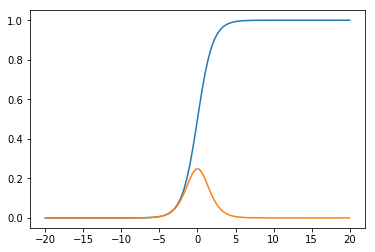

In [52]:
T  = np.linspace(-20,20,100)
Y = sigmoid(T)
z = sigmoid_p(T)
plt.plot(T,Y)
plt.plot(T,z)

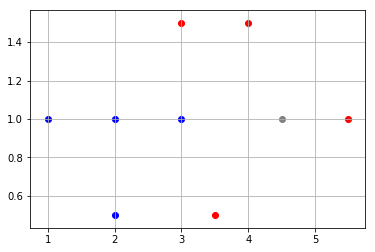

In [59]:


# scatter plot them
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()



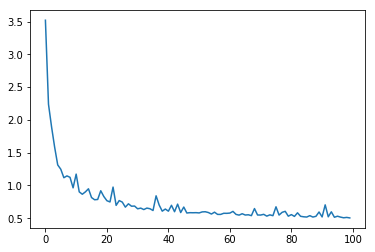

In [54]:
# train

def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

fig = plt.plot(costs)

In [55]:
# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9846855597463693
close to 0 -> blue, close to 1 -> red


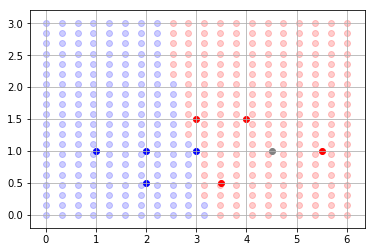

In [60]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()

